In [43]:
%load_ext autoreload
%autoreload 2

import json
import csv
import psycopg2
import os

import numpy as np
import pandas as pd
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# Regional definitions
regions = ['Pacific', 'East South Central', 'West South Central', 'Mountain',
       'New England', 'South Atlantic', 'West North Central',
       'East North Central', 'Mid-Atlantic']

regions_dict = {"CT": "New England", "MA": "New England",
                "ME": "New England", "NH": "New England",
                "RI": "New England", "VT": "New England", "NJ": "Mid-Atlantic",
                "NY": "Mid-Atlantic", "PA": "Mid-Atlantic",
                "IL": "East North Central", "IN": "East North Central",
                "MI": "East North Central", "OH": "East North Central",
                "WI": "East North Central", "IA": "West North Central",
                "KS": "West North Central", "MN": "West North Central",
                "MO": "West North Central", "NE": "West North Central",
                "ND": "West North Central", "SD": "West North Central",
                "DE": "South Atlantic", "FL": "South Atlantic",
                "GA": "South Atlantic", "MD": "South Atlantic",
                "NC": "South Atlantic", "SC": "South Atlantic",
                "VA": "South Atlantic", "DC": "South Atlantic",
                "WV": "South Atlantic", "AL": "East South Central",
                "KY": "East South Central", "MS": "East South Central",
                "TN": "East South Central","AR": "West South Central",
                "LA": "West South Central", "OK": "West South Central",
                "TX": "West South Central", "AZ": "Mountain",
                "CO": "Mountain", "ID": "Mountain", "MT": "Mountain",
                "NV": "Mountain", "NM": "Mountain", "UT": "Mountain",
                "WY": "Mountain","AK": "Pacific", "CA": "Pacific",
                "HI": "Pacific", "OR": "Pacific", "WA": "Pacific"}

no_data_states = ['AK', 'AR', 'ND', 'SD']

In [101]:
# Connect to server
conn = psycopg2.connect()

In [46]:
# Pull 2016 data
sql = """
SELECT geo_id, state, population, eviction_filings, evictions, eviction_filing_rate, eviction_rate
FROM blockgroup
WHERE year = 2016;
"""

with conn.cursor() as cur:
    cur.execute(sql)
    output_2016 = cur.fetchall()

In [47]:
# Pull and process data
labels = ['geo_id', 'state', 'population', 'eviction_filings', 'evictions', 'filing_rate', 'eviction_rate']
df16 = pd.DataFrame.from_records(output_2016, columns = labels)
df16 = df16[~df16['state'].isin(no_data_states)]
df16['region'] = df16['state'].map(regions_dict.get)
df16['evictions_per_1k_filings'] = df16['evictions']/df16['eviction_filings']*1000

In [48]:
df16.head()

,geo_id,state,population,eviction_filings,evictions,filing_rate,eviction_rate,region,evictions_per_1k_filings
534,010439642003,AL,692.0,8.0,3.0,9.09,3.41,East South Central,375.000000
535,010010201001,AL,649.0,0.0,0.0,0.00,0.00,East South Central,NaN
536,010010201002,AL,1299.0,1.0,1.0,1.28,1.28,East South Central,1000.000000
537,010010202001,AL,1074.0,3.0,1.0,2.59,0.86,East South Central,333.333333
538,010010202002,AL,1082.0,4.0,1.0,2.55,0.64,East South Central,250.000000


In [49]:
df16.describe()

,population,eviction_filings,evictions,filing_rate,eviction_rate,evictions_per_1k_filings
count,213832.000000,179825.000000,179825.000000,179825.000000,179825.000000,141236.000000
mean,1455.622208,13.028745,4.995573,5.976922,2.402129,537.298631
std,906.145596,43.528277,10.782919,58.807906,24.125610,359.654048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,892.000000,1.000000,0.000000,0.540000,0.000000,250.000000
50%,1260.000000,3.000000,1.000000,2.460000,1.040000,500.000000
75%,1791.000000,11.000000,5.000000,6.170000,2.970000,937.500000
max,39961.000000,4282.000000,397.000000,14133.330000,9100.000000,1000.000000


In [50]:
# high population outliers
high_pop = df16[df16['population']>20000]
high_pop

,geo_id,state,population,eviction_filings,evictions,filing_rate,eviction_rate,region,evictions_per_1k_filings
27789,060730187001,CA,39454.0,1.0,1.0,0.02,0.02,Pacific,1000.000000
48342,120950167301,FL,30258.0,113.0,46.0,4.01,1.63,South Atlantic,407.079646
51658,121199112001,FL,38169.0,6.0,6.0,0.97,0.97,South Atlantic,1000.000000
184768,480396606022,TX,22054.0,2.0,0.0,0.10,0.00,West South Central,0.000000
189312,481576729001,TX,38137.0,134.0,66.0,5.17,2.54,West South Central,492.537313
189320,481576731011,TX,39961.0,72.0,41.0,3.02,1.72,West South Central,569.444444


First is a San Diego county, 2nd Orange County, 3rd Sumpter,  

## Population vs Eviction Filings, Evictions

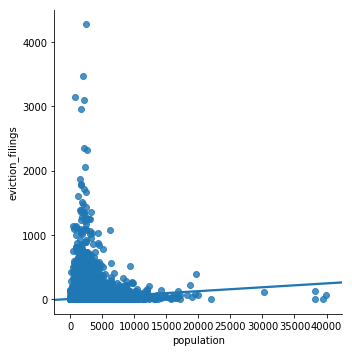

In [51]:
# Pop vs eviction filings, 2016
sns.lmplot(x = 'population', y = 'eviction_filings', data = df16)

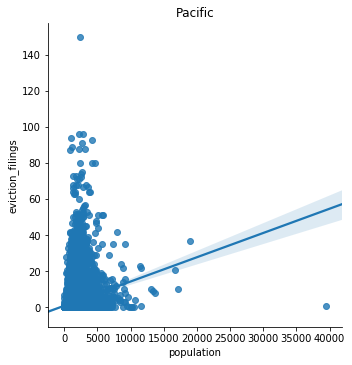

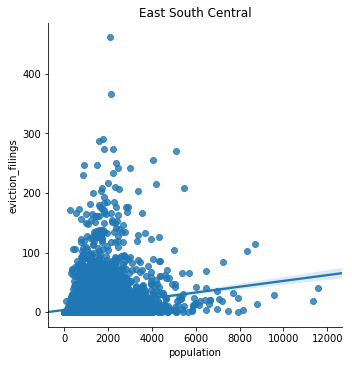

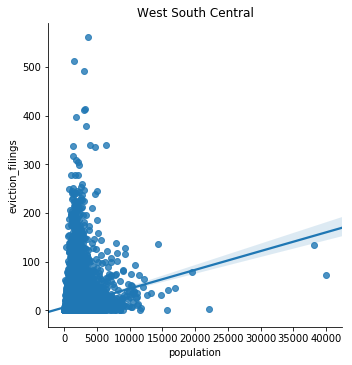

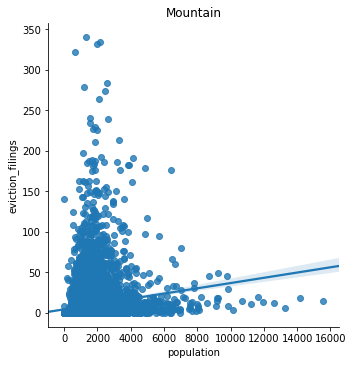

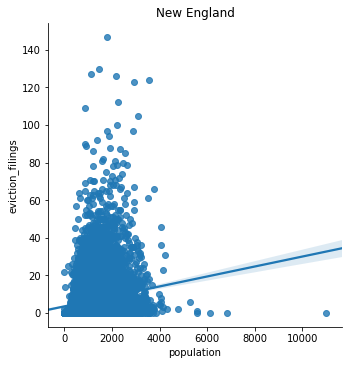

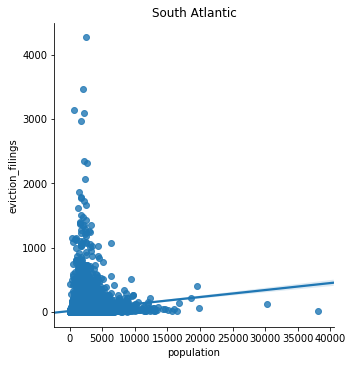

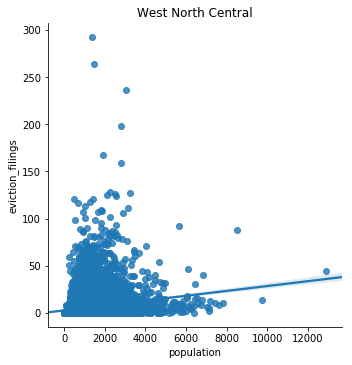

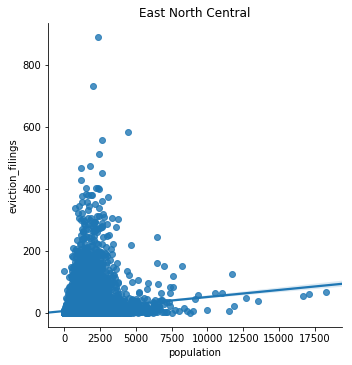

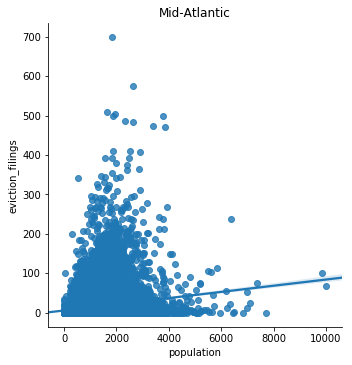

In [52]:
for region in regions:
    regdf = df16[df16['region']==region]
    sns.lmplot(x = 'population', y = 'eviction_filings', data = regdf)
    plt.title(region)

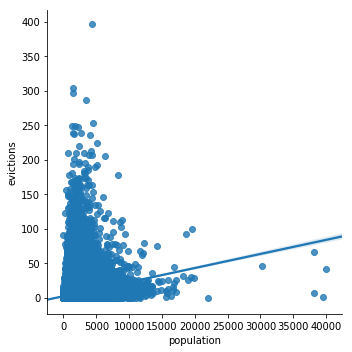

In [53]:
# Pop vs evictions, 2016
sns.lmplot(x = 'population', y = 'evictions', data = df16)

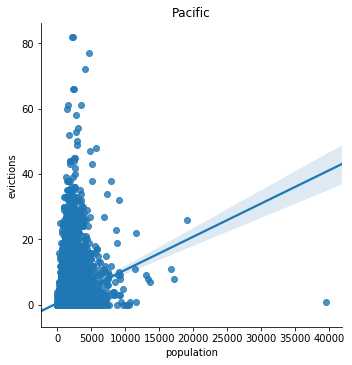

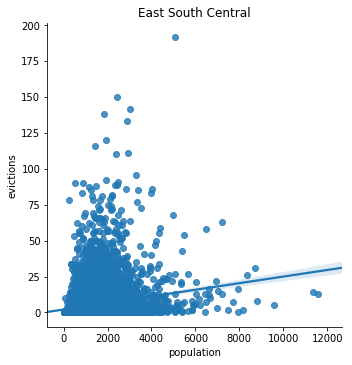

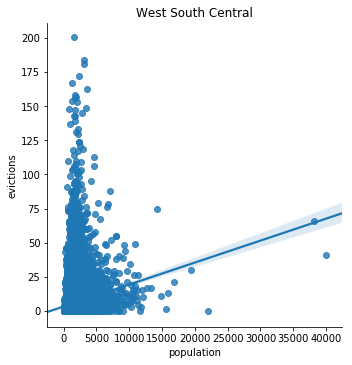

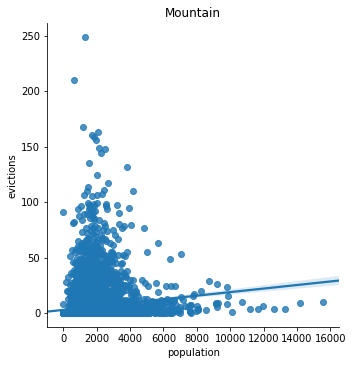

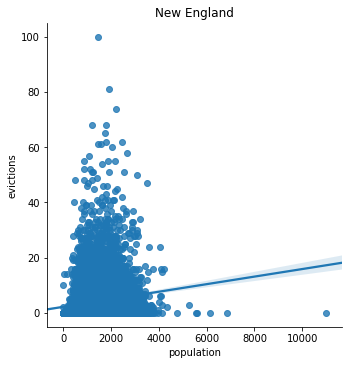

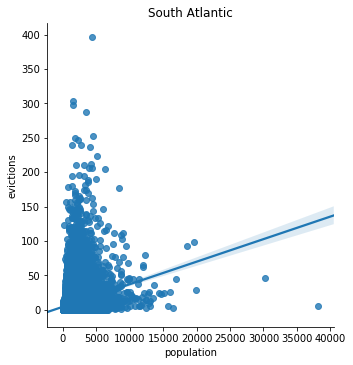

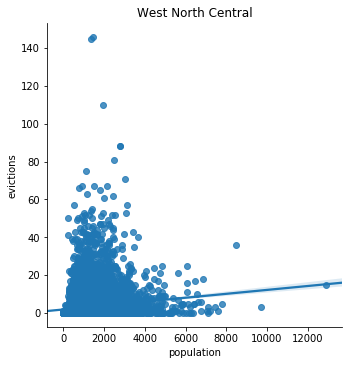

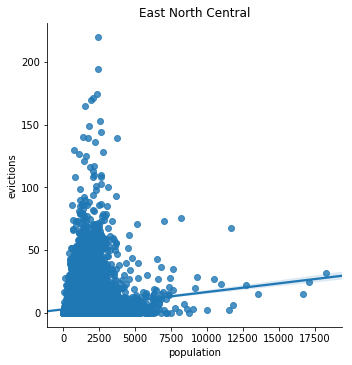

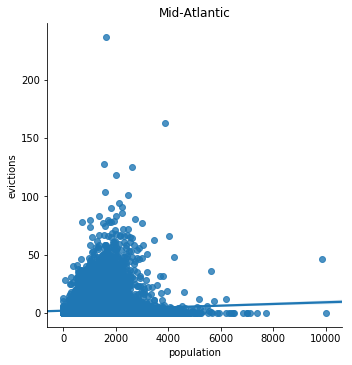

In [54]:
for region in regions:
    regdf = df16[df16['region']==region]
    sns.lmplot(x = 'population', y = 'evictions', data = regdf)
    plt.title(region)

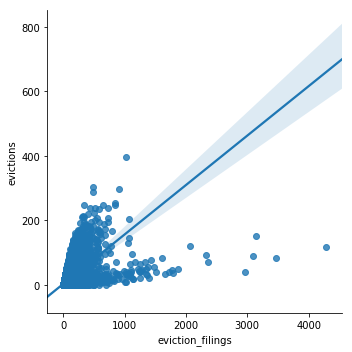

In [55]:
sns.lmplot(x = 'eviction_filings', y = 'evictions', data = df16)

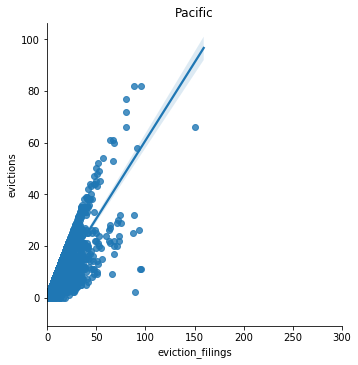

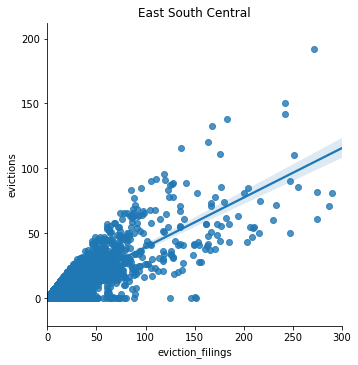

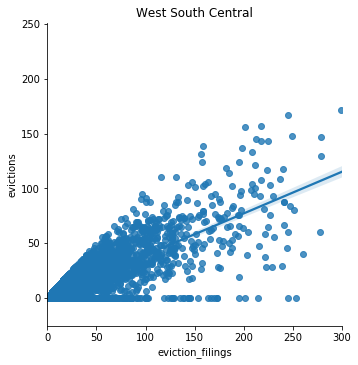

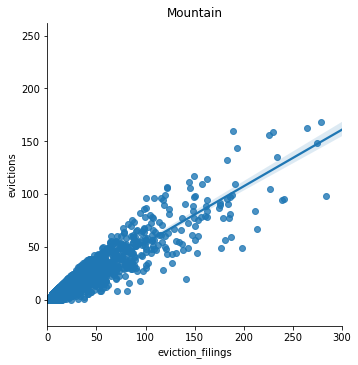

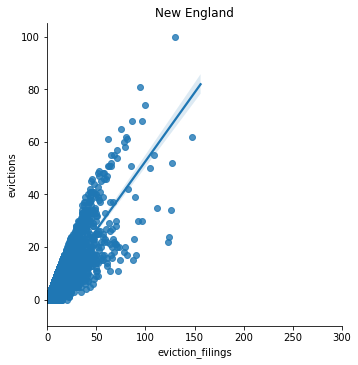

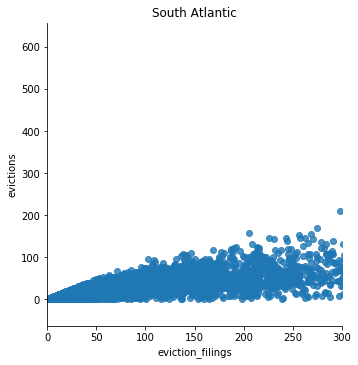

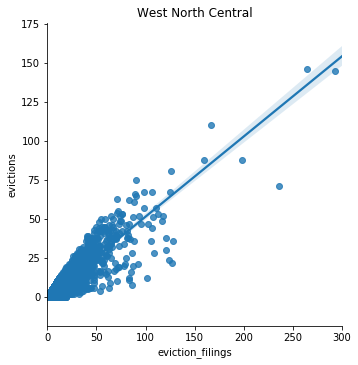

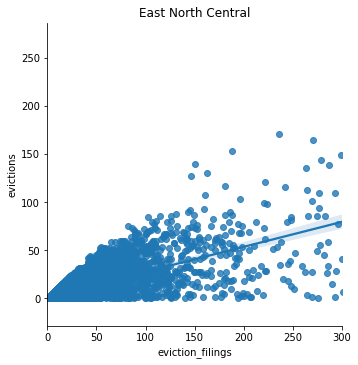

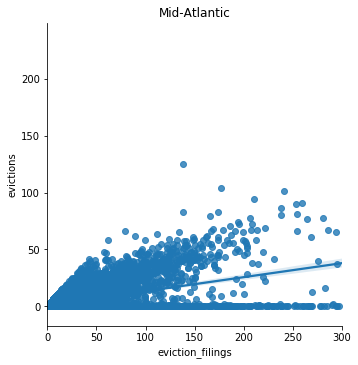

In [58]:
for region in regions:
    regdf = df16[df16['region']==region]
    sns.lmplot(x = 'eviction_filings', y = 'evictions', data = regdf)
    plt.title(region)
    plt.xlim(0, 300) 
    
    #plt.ylim(0,300)

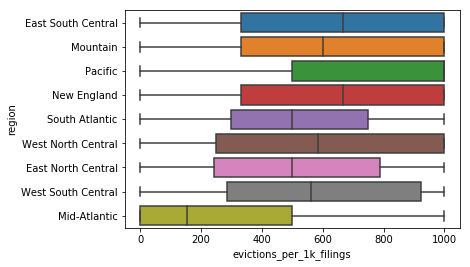

In [59]:
sns.boxplot(x = 'evictions_per_1k_filings', y='region', data = df16)

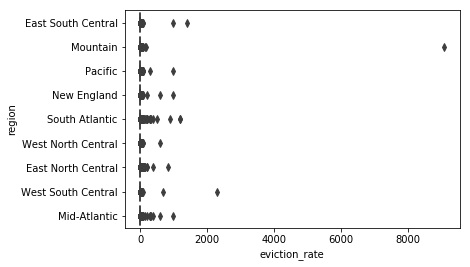

In [123]:
# crazy outliers, need to exclude those outside of a reasonable bound
sns.boxplot(x = 'eviction_rate', y='region', data = df16)

In [64]:
# What's up in the Midatlantic? Real or not? Have these cases not closed? check other years?
midatl = df16[df16['region']=='Mid-Atlantic']
midatl

,geo_id,state,population,eviction_filings,evictions,filing_rate,eviction_rate,region,evictions_per_1k_filings
124812,340010001001,NJ,1175.0,18.0,0.0,7.50,0.00,Mid-Atlantic,0.000000
124813,340010001002,NJ,1038.0,48.0,0.0,16.72,0.00,Mid-Atlantic,0.000000
124814,340010002001,NJ,1411.0,18.0,1.0,6.57,0.36,Mid-Atlantic,55.555556
124815,340010002002,NJ,1032.0,18.0,0.0,7.38,0.00,Mid-Atlantic,0.000000
124816,340010002003,NJ,887.0,20.0,0.0,14.39,0.00,Mid-Atlantic,0.000000
124817,340010003001,NJ,1196.0,24.0,0.0,4.90,0.00,Mid-Atlantic,0.000000
124818,340010003002,NJ,2361.0,40.0,0.0,11.70,0.00,Mid-Atlantic,0.000000
124819,340010003003,NJ,871.0,36.0,0.0,13.95,0.00,Mid-Atlantic,0.000000
124820,340010004001,NJ,1087.0,20.0,0.0,7.49,0.00,Mid-Atlantic,0.000000
124821,340010004002,NJ,848.0,112.0,0.0,24.51,0.00,Mid-Atlantic,0.000000


### Midatlantic Look

In [108]:
sql_ma = """
SELECT geo_id, state, year, population, eviction_filings, evictions, eviction_filing_rate, eviction_rate
FROM blockgroup
WHERE state = 'NJ' 
OR state = 'NY' 
OR state = 'PA';
"""

with conn.cursor() as cur:
    cur.execute(sql_ma)
    output_ma = cur.fetchall()

In [110]:
ma_labels = ['geo_id', 'state', 'year', 'population', 'eviction_filings', 'evictions', 'filing_rate', 'eviction_rate']
dfma = pd.DataFrame.from_records(output_ma, columns = ma_labels)
dfma['evictions_per_1k_filings'] = dfma['evictions']/dfma['eviction_filings']*1000

In [111]:
dfma.head()

,geo_id,state,year,population,eviction_filings,evictions,filing_rate,eviction_rate,evictions_per_1k_filings
0,340010012001,NJ,2000,952.0,NaN,NaN,NaN,NaN,NaN
1,340010103002,NJ,2000,1272.0,NaN,NaN,NaN,NaN,NaN
2,340010130001,NJ,2000,1581.0,NaN,NaN,NaN,NaN,NaN
3,340030031001,NJ,2000,829.0,NaN,NaN,NaN,NaN,NaN
4,340030151002,NJ,2000,636.0,NaN,NaN,NaN,NaN,NaN


In [112]:
dfma.describe()

,year,population,eviction_filings,evictions,filing_rate,eviction_rate,evictions_per_1k_filings
count,535902.000000,535902.000000,368392.000000,368392.000000,368392.000000,368392.000000,295219.000000
mean,2007.999938,1287.990449,18.640522,3.751379,8.282285,2.036147,355.810622
std,4.898974,614.346162,44.342265,7.235744,119.757387,22.081402,352.880046
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,871.920000,1.000000,0.000000,1.100000,0.000000,0.000000
50%,2008.000000,1175.000000,5.000000,1.000000,4.120000,0.740000,250.000000
75%,2012.000000,1580.000000,17.000000,4.000000,9.320000,2.620000,607.142857
max,2016.000000,12780.000000,1921.000000,299.000000,50000.000000,11111.110000,1000.000000


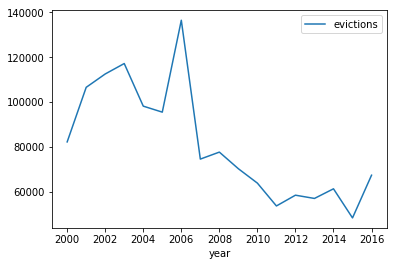

In [118]:
dfma.groupby('year')['evictions'].sum().to_frame().plot(kind='line')

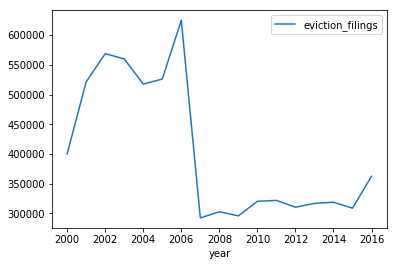

In [119]:
dfma.groupby('year')['eviction_filings'].sum().to_frame().plot(kind='line')

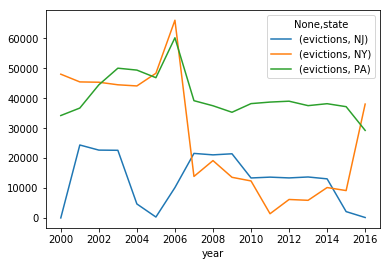

In [116]:
# total over time, evictions
dfma.groupby(['state','year'])['evictions'].sum().to_frame().unstack(level=0).plot(kind='line')

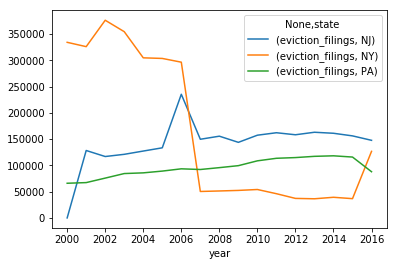

In [117]:
dfma.groupby(['state','year'])['eviction_filings'].sum().to_frame().unstack(level=0).plot(kind='line')

## Population vs Filing Rates, Eviction Rates

In [60]:
# remove high rate outliers, <=10
low_rates = df16[df16['filing_rate']<=10]

(0, 10000)

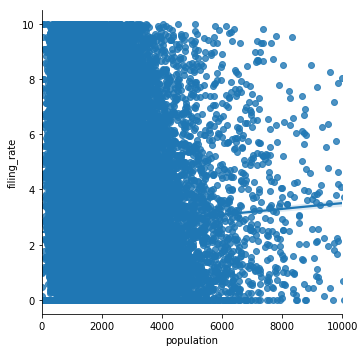

In [61]:
sns.lmplot(x = 'population', y = 'filing_rate', data = low_rates)
plt.xlim(0,10000)

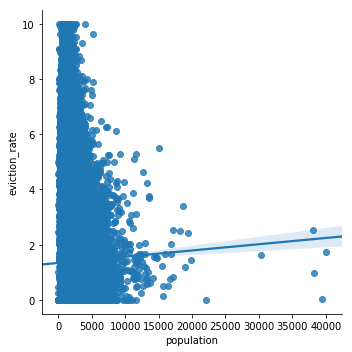

In [62]:
sns.lmplot(x = 'population', y = 'eviction_rate', data = low_rates)

# boxplots with rates, factor plots by state

## Top 20%

In [76]:
num = df16.shape[0]
n_lrg = int(num*0.2)
top_20pct_num = df16.nlargest(n_lrg, columns='evictions')
top_20pct_num

,geo_id,state,population,eviction_filings,evictions,filing_rate,eviction_rate,region,evictions_per_1k_filings
175924,450190031141,SC,4359.0,1030.0,397.0,56.19,21.66,South Atlantic,385.436893
205372,517600706013,VA,1512.0,478.0,304.0,87.55,55.68,South Atlantic,635.983264
177757,450790104121,SC,1504.0,914.0,297.0,95.51,31.03,South Atlantic,324.945295
175769,450150208111,SC,3475.0,490.0,287.0,43.10,25.24,South Atlantic,585.714286
54142,130890234283,GA,4534.0,837.0,253.0,70.10,21.19,South Atlantic,302.270012
132783,320030017102,NV,1289.0,341.0,249.0,80.81,59.00,Mountain,730.205279
177750,450790104091,SC,1821.0,851.0,249.0,108.55,31.76,South Atlantic,292.596945
177784,450790108051,SC,2247.0,644.0,247.0,59.03,22.64,South Atlantic,383.540373
177759,450790104131,SC,1410.0,435.0,239.0,44.98,24.72,South Atlantic,549.425287
177809,450790113033,SC,2690.0,727.0,239.0,48.53,15.95,South Atlantic,328.748281


In [83]:
# Numerical distribution of top 20% of num evictions by state
top20_num = top_20pct_num.groupby('state')['geo_id'].count().to_frame()

In [79]:
top_20pct_rate = df16.nlargest(n_lrg, columns='eviction_rate')
top_20pct_rate

,geo_id,state,population,eviction_filings,evictions,filing_rate,eviction_rate,region,evictions_per_1k_filings
132863,320030026041,NV,0.0,140.0,91.0,14000.00,9100.00,Mountain,650.000000
188252,481210217281,TX,796.0,42.0,23.0,4200.00,2300.00,West South Central,547.619048
2943,010970036051,AL,634.0,25.0,14.0,2500.00,1400.00,East South Central,560.000000
52860,130519800001,GA,0.0,28.0,12.0,2800.00,1200.00,South Atlantic,428.571429
202607,510879801001,VA,0.0,42.0,12.0,4200.00,1200.00,South Atlantic,285.714286
21901,060590626101,CA,520.0,10.0,10.0,1000.00,1000.00,Pacific,1000.000000
88059,250173501031,MA,0.0,22.0,10.0,2200.00,1000.00,New England,454.545455
173158,421019803001,PA,0.0,19.0,10.0,1900.00,1000.00,Mid-Atlantic,526.315789
182506,471579801001,TN,64.0,19.0,10.0,1900.00,1000.00,East South Central,526.315789
44695,120579805001,FL,17.0,32.0,9.0,3200.00,900.00,South Atlantic,281.250000


In [98]:
top20_rate = top_20pct_rate.groupby('state')['geo_id'].count().to_frame()

In [89]:
top20_comp = pd.merge(top20_num, top20_rate, left_index=True, right_index=True, how='left')
top20_comp

,geo_id_x,geo_id_y
state,,
AL,642,519
AZ,325,282
CA,2055,1159
CO,768,632
CT,690,802
DC,191,134
DE,261,310
FL,3567,2867
GA,2326,2269


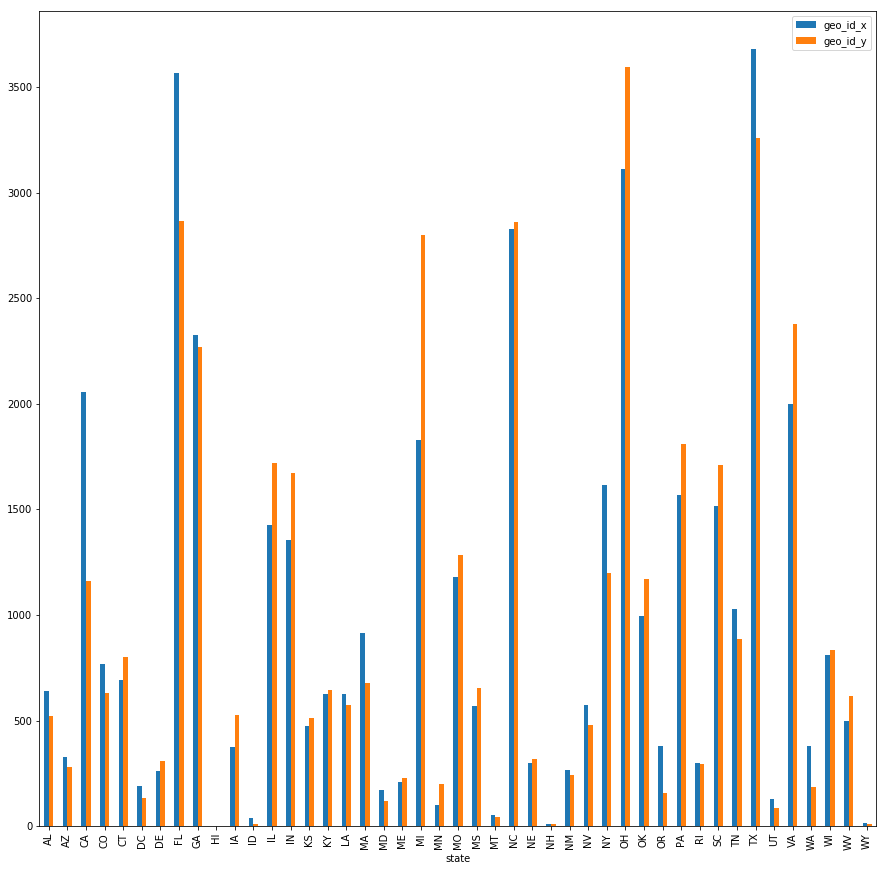

In [97]:
top20_comp.plot(kind='bar', figsize = (15,15))

## Find a specific block or two that changed significantly over the time period